<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Introdução

Para elaboração desse modelo optei por utilizar duas bases do kaggle (https://www.kaggle.com), sendo a primeira uma base com os números do covid 19 no mundo e a segunda uma base que traz o total da população mundial segmentado por países, com essas duas bases implementei um modelo com o objetivo de responder as seguintes perguntas:

1.  Quais são os 10 países que mais tiveram vítimas do covid 19
2.  Quais são os 10 países que menos tiveram vítimas do covid 19
3.  Quais são os 10 países que mais tiveram vítimas do covid 19 proporcional ao número de habitantes
4.  Quais são os 10 países que menos tiveram vítimas do covid 10 proporcional ao número de habitantes
5.  Quais são os 10 países que mais recuperaram pacientes do covid 19
6.  Quais são os 10 países que menos recuperaram pacientes do covid 19
7.  Quais são os 10 países que mais identificaram casos de covid 19
8.  Quais são os 10 países que menos identificaram casos de covid 19

Entendo que com essa escolha será possível colocar em prática a maior parte dos conhecimentos adquiridos em aula na disciplina paradigmas de linguagem de programação em ciência de dados.

__Github do projeto:__ https://github.com/joaonart/mcz-pl-a4-modelo-ja

# Importação das Bibliotecas Python

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Aquisição dos Dados

In [138]:
# Base com números do impacto do covid 19 no mundo, dados de 22/01/2020 á 04/03/2022
# Fonte: https://www.kaggle.com/danielfesalbon/covid-19-global-reports-early-march-2022
covidbase = pd.read_csv('https://raw.githubusercontent.com/joaonart/mcz-pl-a4-modelo-ja/master/data/covid_19_clean_complete_2022.csv')

# Base com números da população mundial por países, atualizado até 2020
# Fonte: https://www.kaggle.com/tanuprabhu/population-by-country-2020
worldpopulation = pd.read_csv('https://raw.githubusercontent.com/joaonart/mcz-pl-a4-modelo-ja/master/data/population_by_country_2020.csv')

# Exploração Inicial dos Dados

In [139]:
display(covidbase.shape)
display(covidbase.head())
display(covidbase.tail())
display(covidbase.Date.duplicated().sum())
display(covidbase.Date.min(), covidbase.Date.max())
display(covidbase.dtypes)

(214894, 10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
214889,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-04,649971,5557,0,644414,Eastern Mediterranean
214890,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-04,530,0,0,530,NaN
214891,NaN,Yemen,15.552727,48.516388,2022-03-04,11774,2135,0,9639,Eastern Mediterranean
214892,NaN,Zambia,-13.133897,27.849332,2022-03-04,313613,3958,0,309655,Africa
214893,NaN,Zimbabwe,-19.015438,29.154857,2022-03-04,238739,5397,0,233342,Africa


214121

'2020-01-22'

'2022-03-04'

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [140]:
display(worldpopulation.shape)
display(worldpopulation.head())
display(worldpopulation.tail())
display(worldpopulation.dtypes)

(235, 11)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %


Country (or dependency)     object
Population (2020)            int64
Yearly Change               object
Net Change                   int64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)             float64
Fert. Rate                  object
Med. Age                    object
Urban Pop %                 object
World Share                 object
dtype: object

# Transformações dos Dados

In [141]:
# Convertendo o tipo da coluna Date pata datetime64
covidbase.Date = pd.to_datetime(covidbase.Date, format='%Y-%m-%d', errors='coerce')

# Renomeando as colunas Province/State, Country/Region e WHO Region
covidbase = covidbase.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region','WHO Region':'WHO_Region'})

# Renomeando o valor das linhas que contem valor US para United States
covidbase['Country_Region'] = covidbase['Country_Region'].replace(['US'],'United States')

# Removendo os dados das olimpíadas de verão 2020 e olimpíadas de inverno 2022
covidbase = covidbase.loc[covidbase["Country_Region"] != 'Summer Olympics 2020']
covidbase = covidbase.loc[covidbase["Country_Region"] != 'Winter Olympics 2022']

# Adicionando novas colunas Date_Year, Date_Month, Date_Day
covidbase['Date_Year'] =  pd.DatetimeIndex(covidbase['Date']).year
covidbase['Date_Month'] =  pd.DatetimeIndex(covidbase['Date']).month
covidbase['Date_Day'] =  pd.DatetimeIndex(covidbase['Date']).day

display(covidbase.dtypes)
covidbase.head()

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO_Region                object
Date_Year                  int64
Date_Month                 int64
Date_Day                   int64
dtype: object

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO_Region,Date_Year,Date_Month,Date_Day
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020,1,22
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2020,1,22
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,2020,1,22
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,2020,1,22
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,2020,1,22


In [142]:
# Renomeando as colunas Country (or dependency), Population (2020)
worldpopulation = worldpopulation.rename(columns={'Country (or dependency)':'Country','Population (2020)':'Population'})
display(worldpopulation.dtypes)
worldpopulation.head()

Country             object
Population           int64
Yearly Change       object
Net Change           int64
Density (P/Km²)      int64
Land Area (Km²)      int64
Migrants (net)     float64
Fert. Rate          object
Med. Age            object
Urban Pop %         object
World Share         object
dtype: object

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


# Análise dos Dados

Inicialmente vamos observar o número de registros ausentes, aqui já identificamos que temos uma considerável quantidade de registros ausentes em algumas colunas em ambos os dataframes.

In [143]:
display(covidbase.isnull().sum() / len(covidbase))

Province_State    0.692029
Country_Region    0.000000
Lat               0.007246
Long              0.007246
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
Recovered         0.000000
Active            0.000000
WHO_Region        0.003623
Date_Year         0.000000
Date_Month        0.000000
Date_Day          0.000000
dtype: float64

In [144]:
display(worldpopulation.isnull().sum() / len(worldpopulation))

Country            0.000000
Population         0.000000
Yearly Change      0.000000
Net Change         0.000000
Density (P/Km²)    0.000000
Land Area (Km²)    0.000000
Migrants (net)     0.144681
Fert. Rate         0.000000
Med. Age           0.000000
Urban Pop %        0.000000
World Share        0.000000
dtype: float64

A primeira pergunta que buscamos responder é qual é o top 10 de países/regiões que apresentam o maior número de vitimas do covid 19.

In [145]:
display(covidbase.groupby(['Country_Region'])['Deaths'].max().nlargest(10))

Country_Region
United States     958144
Brazil            651522
India             514878
Russia            347730
Mexico            319296
Peru              210907
United Kingdom    162008
Italy             155609
Indonesia         149596
Colombia          138984
Name: Deaths, dtype: int64

Nossa segunda pergunta é qual é o top 10 de países/regiões que apresentam o menor número de vítimas do covid 19.

In [146]:
display(covidbase.groupby(['Country_Region'])['Deaths'].max().nsmallest(10))

Country_Region
Antarctica           0
Holy See             0
Marshall Islands     0
Micronesia           0
Samoa                0
Tonga                1
Vanuatu              1
Bhutan               6
Palau                6
Kiribati            11
Name: Deaths, dtype: int64

Porém nossa análise ficaria mais interessante cruzando as informações que temos do impacto do covid 19 x o tamanho da população dos países, para tanto vamos primeiro realizar uma agregação de bases identificando os números acumulados de óbitos, casos confirmados e casos recuperados.

In [147]:
# Visão agregada covid x world population
covidbaseagg = covidbase.groupby('Country_Region') \
                            .agg(max_deaths = ('Deaths', 'max'), \
                                 max_confirmed = ('Confirmed', 'max'),
                                 max_recovered = ('Recovered', 'max'))

display(covidbaseagg)

,max_deaths,max_confirmed,max_recovered
Country_Region,,,
Afghanistan,7619,174214,82586
Albania,3478,272030,130314
Algeria,6852,265186,118409
Andorra,151,38434,14380
Angola,1900,98796,39582
...,...,...,...
Vietnam,40644,4059262,54332
West Bank and Gaza,5557,649971,312320
Yemen,2135,11774,4251


Agora vamos realizar um merge dos dataframes __covidbaseagg__ e __worldpopulation__, utilizaremos como chave o campo __Country_Region__ presente no df covidbaseagg e o campo __Country__ presente no df worldpopulation

In [148]:
covidbaseaggworld = pd.merge(covidbaseagg,worldpopulation, left_on='Country_Region', right_on='Country')

display(covidbaseaggworld)

,max_deaths,max_confirmed,max_recovered,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,7619,174214,82586,Afghanistan,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
1,3478,272030,130314,Albania,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
2,6852,265186,118409,Algeria,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
3,151,38434,14380,Andorra,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
4,1900,98796,39582,Angola,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,5645,516236,294607,Venezuela,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
179,40644,4059262,54332,Vietnam,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
180,2135,11774,4251,Yemen,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %
181,3958,313613,189658,Zambia,18468257,2.93 %,522925,25,743390,-8000.0,4.7,18,45 %,0.24 %


Agora vamos analisar a proporção de vitimas em relação a população do país/região, esse número é interessante pois nos traz a perspectiva de impacto, se o mesmo esta relacionado a proporção de habitantes, para tanto vamos incluir uma nova coluna chamada __percent_deaths_by_population__ em nosso dataframe

In [149]:
# Criando a nova coluna percent_deaths_by_population
covidbaseaggworld['percent_deaths_by_population'] = ((covidbaseaggworld['max_deaths'] / covidbaseaggworld['Population']) * 100).round(4)

display(covidbaseaggworld)

,max_deaths,max_confirmed,max_recovered,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,percent_deaths_by_population
0,7619,174214,82586,Afghanistan,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %,0.0195
1,3478,272030,130314,Albania,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %,0.1209
2,6852,265186,118409,Algeria,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %,0.0156
3,151,38434,14380,Andorra,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %,0.1954
4,1900,98796,39582,Angola,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %,0.0058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,5645,516236,294607,Venezuela,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %,0.0199
179,40644,4059262,54332,Vietnam,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %,0.0417
180,2135,11774,4251,Yemen,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %,0.0071
181,3958,313613,189658,Zambia,18468257,2.93 %,522925,25,743390,-8000.0,4.7,18,45 %,0.24 %,0.0214


Podemos mais uma vez responder as perguntas sobre o top 10 países mais e menos afetados em número de vítimas do covid 19

In [150]:
# Top 10 países mais afetados com vítimas do covid 19
covidbaseaggworld.nlargest(10, 'max_deaths')

,max_deaths,max_confirmed,max_recovered,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,percent_deaths_by_population
174,958144,79250509,6298082,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %,0.2892
23,651522,28978052,17771228,Brazil,212821986,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %,0.3061
74,514878,42957477,30974748,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %,0.0372
136,347730,16533932,5609682,Russia,145945524,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %,0.2383
107,319296,5544644,2270427,Mexico,129166028,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %,0.2472
130,210907,3522484,2086086,Peru,33050211,1.42 %,461401,26,1280000,99069.0,2.3,31,79 %,0.42 %,0.6381
173,162008,19119181,8322,United Kingdom,67948282,0.53 %,355839,281,241930,260650.0,1.8,40,83 %,0.87 %,0.2384
80,155609,12948859,4144608,Italy,60446035,-0.15 %,-88249,206,294140,148943.0,1.3,47,69 %,0.78 %,0.2574
75,149596,5693702,2907920,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %,0.0546
36,138984,6069425,4615354,Colombia,50976248,1.08 %,543448,46,1109500,204796.0,1.8,31,80 %,0.65 %,0.2726


In [151]:
# Top 10 países menos afetados com vítimas do covid 19
covidbaseaggworld.nsmallest(10, 'max_deaths')

,max_deaths,max_confirmed,max_recovered,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,percent_deaths_by_population
70,0,29,27,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %,0.0000
104,0,7,4,Marshall Islands,59259,0.68 %,399,329,180,NaN,N.A.,N.A.,70 %,0.00 %,0.0000
108,0,1,1,Micronesia,115231,1.06 %,1208,164,700,-600.0,3.1,24,21 %,0.00 %,0.0000
139,0,33,3,Samoa,198643,0.67 %,1317,70,2830,-2803.0,3.9,22,18 %,0.00 %,0.0000
166,1,715,0,Tonga,105901,1.15 %,1201,147,720,-800.0,3.6,22,24 %,0.00 %,0.0009
177,1,19,3,Vanuatu,308337,2.42 %,7263,25,12190,120.0,3.8,21,24 %,0.00 %,0.0003
19,6,14120,2418,Bhutan,773069,1.12 %,8516,20,38117,320.0,2.0,28,46 %,0.01 %,0.0008
126,6,3844,0,Palau,18109,0.48 %,86,39,460,NaN,N.A.,N.A.,N.A.,0.00 %,0.0331
86,11,2974,0,Kiribati,119760,1.57 %,1843,147,810,-800.0,3.6,23,57 %,0.00 %,0.0092
63,20,11806,87,Greenland,56787,0.17 %,98,0,410450,NaN,N.A.,N.A.,87 %,0.00 %,0.0352


Agora podemos fazer uma nova pergunta utilizando a nova coluna __percent_deaths_by_population__, ou seja, qual será os países/regiões que tiveram mais e menos vitimas de covid 19 com base na proporção populacional.

In [152]:
# Top 10 países mais afetados com vítimas do covid 19 proporcional a sua população
covidbaseaggworld.nlargest(10, 'percent_deaths_by_population')

,max_deaths,max_confirmed,max_recovered,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,percent_deaths_by_population
130,210907,3522484,2086086,Peru,33050211,1.42 %,461401,26,1280000,99069.0,2.3,31,79 %,0.42 %,0.6381
25,35790,1099423,398721,Bulgaria,6939018,-0.74 %,-51674,64,108560,-4800.0,1.6,45,76 %,0.09 %,0.5158
21,15519,372139,189710,Bosnia and Herzegovina,3277152,-0.61 %,-20181,64,51000,-21585.0,1.3,43,52 %,0.04 %,0.4736
72,44286,1800046,749773,Hungary,9655983,-0.25 %,-24328,107,90530,6000.0,1.5,43,72 %,0.12 %,0.4586
122,9065,299049,150440,North Macedonia,2083359,0.00 %,-85,83,25220,-1000.0,1.5,39,59 %,0.03 %,0.4351
112,2684,230759,99152,Montenegro,628080,0.01 %,79,47,13450,-480.0,1.8,39,68 %,0.01 %,0.4273
59,16306,1620639,390827,Georgia,3987805,-0.19 %,-7598,57,69490,-10000.0,2.1,38,58 %,0.05 %,0.4089
39,15172,1061429,354830,Croatia,4100719,-0.61 %,-25037,73,55960,-8001.0,1.4,44,58 %,0.05 %,0.3700
147,18631,2178234,255300,Slovakia,5460109,0.05 %,2629,114,48088,1485.0,1.5,41,54 %,0.07 %,0.3412
135,63849,2760332,1048072,Romania,19214608,-0.66 %,-126866,84,230170,-73999.0,1.6,43,55 %,0.25 %,0.3323


In [153]:
# Top 10 países menos afetados com vítimas do covid 19 proporcional a sua população
covidbaseaggworld.nsmallest(10, 'percent_deaths_by_population')

,max_deaths,max_confirmed,max_recovered,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,percent_deaths_by_population
70,0,29,27,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %,0.0000
104,0,7,4,Marshall Islands,59259,0.68 %,399,329,180,NaN,N.A.,N.A.,70 %,0.00 %,0.0000
108,0,1,1,Micronesia,115231,1.06 %,1208,164,700,-600.0,3.1,24,21 %,0.00 %,0.0000
139,0,33,3,Samoa,198643,0.67 %,1317,70,2830,-2803.0,3.9,22,18 %,0.00 %,0.0000
27,38,38150,773,Burundi,11948454,3.12 %,360204,463,25680,2001.0,5.5,17,14 %,0.15 %,0.0003
35,4512,403080,64435,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %,0.0003
177,1,19,3,Vanuatu,308337,2.42 %,7263,25,12190,120.0,3.8,21,24 %,0.00 %,0.0003
19,6,14120,2418,Bhutan,773069,1.12 %,8516,20,38117,320.0,2.0,28,46 %,0.01 %,0.0008
166,1,715,0,Tonga,105901,1.15 %,1201,147,720,-800.0,3.6,22,24 %,0.00 %,0.0009
33,190,7257,4796,Chad,16502877,3.00 %,478988,13,1259200,2000.0,5.8,17,23 %,0.21 %,0.0012


# Exibição dos Resultados

Agora que organizamos os nossos dados e temos uma boa noção do que temos em mãos, vamos em busca de mais algumas respostas e vamos plotar os resultados em gráficos para facilitar a nossa visão.

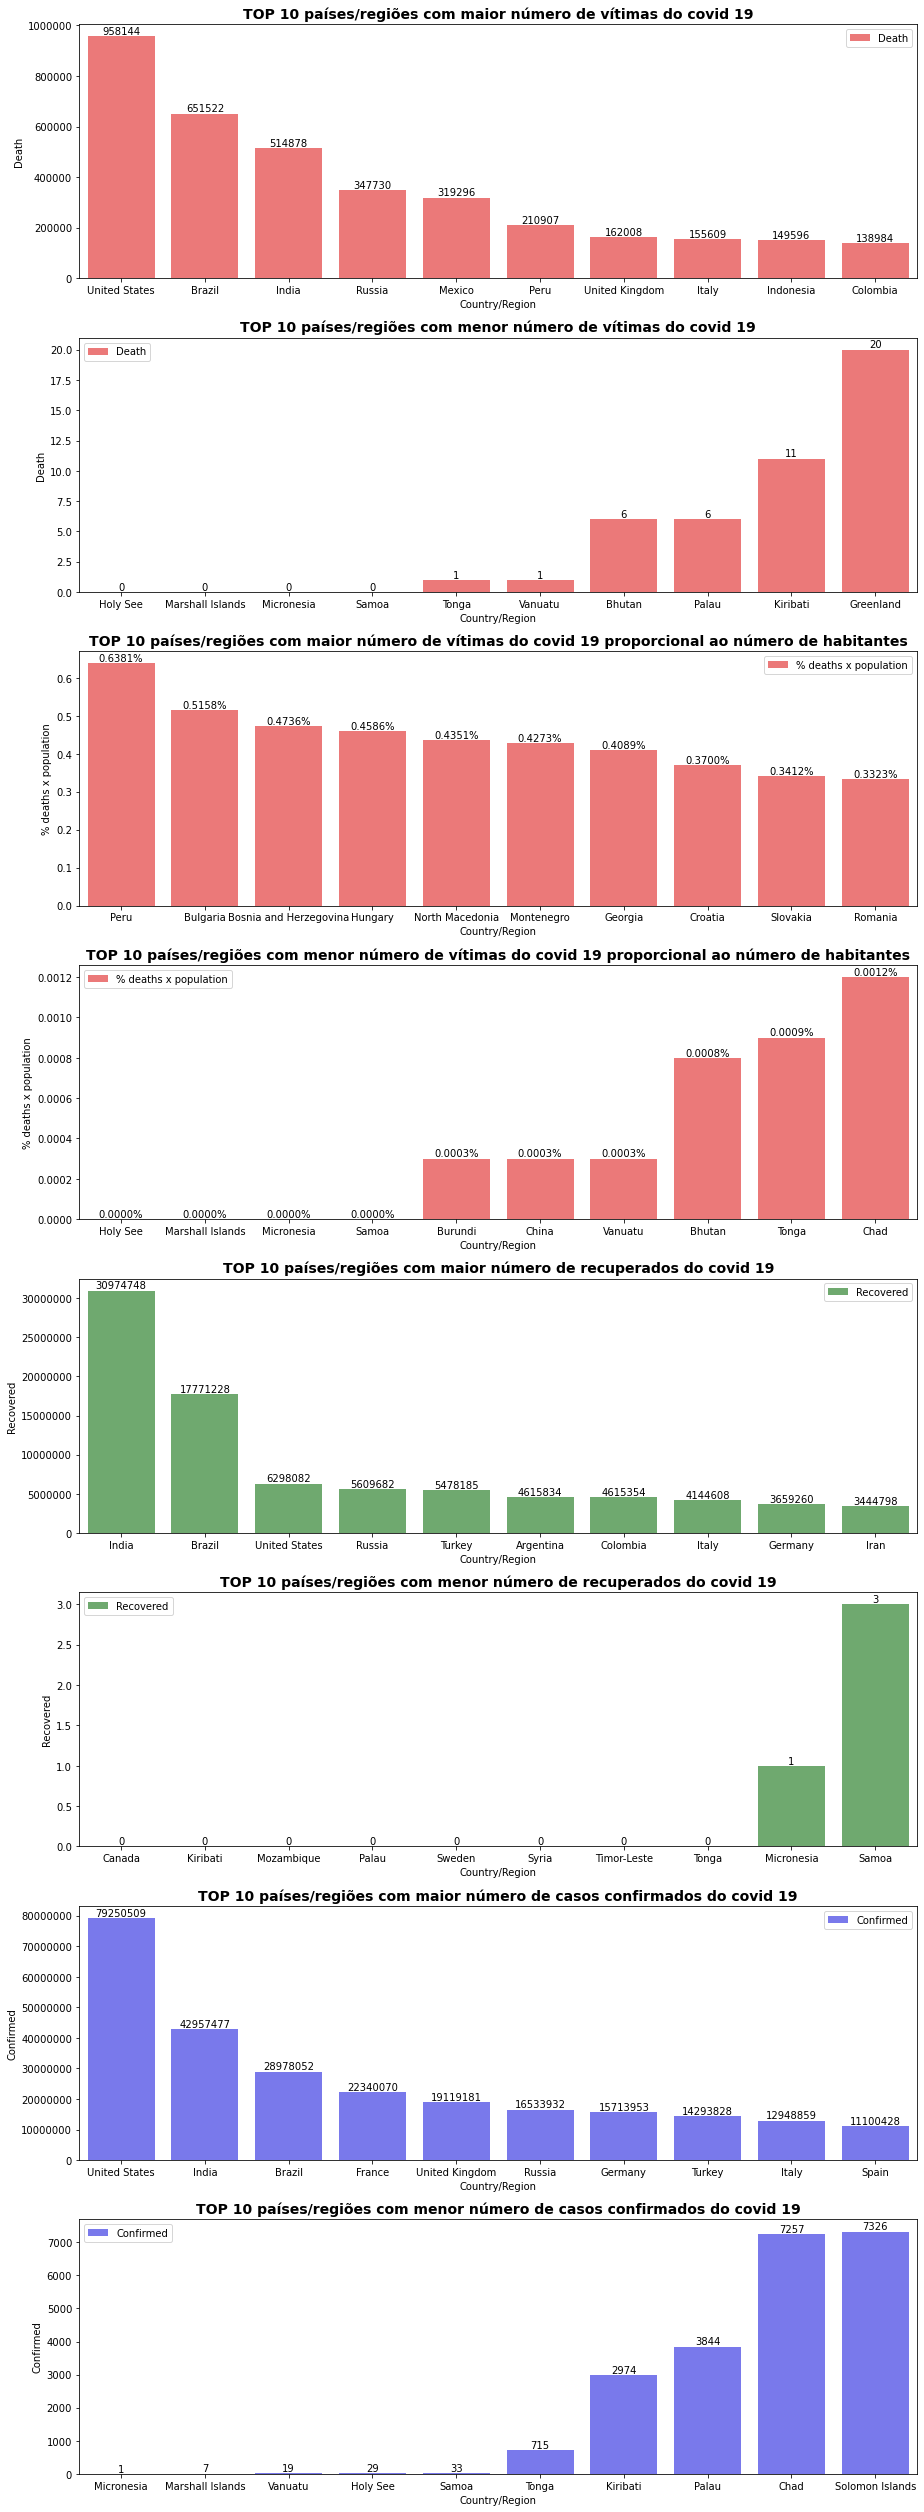

In [159]:
df_top_10_max_deaths = covidbaseaggworld.nlargest(10, 'max_deaths')
df_top_10_min_deaths = covidbaseaggworld.nsmallest(10, 'max_deaths')

df_top_10_max_deaths_pop = covidbaseaggworld.nlargest(10, 'percent_deaths_by_population')
df_top_10_min_deaths_pop = covidbaseaggworld.nsmallest(10, 'percent_deaths_by_population')

df_top_10_max_recovered = covidbaseaggworld.nlargest(10, 'max_recovered')
df_top_10_min_recovered = covidbaseaggworld.nsmallest(10, 'max_recovered')

df_top_10_max_confirmed = covidbaseaggworld.nlargest(10, 'max_confirmed')
df_top_10_min_confirmed = covidbaseaggworld.nsmallest(10, 'max_confirmed')

plt.figure(figsize=(13,35))

plt.subplot(8,1,1)
ax = sns.barplot(x=df_top_10_max_deaths.Country, y=df_top_10_max_deaths.max_deaths, color='r', alpha=0.6, label='Death')
#ax.bar_label(ax.containers[0],fmt = '%d') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com maior número de vítimas do covid 19', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('Death')
plt.legend()

plt.subplot(8,1,2)
ax=sns.barplot(x=df_top_10_min_deaths.Country, y=df_top_10_min_deaths.max_deaths, color='r', alpha=0.6, label='Death')
#ax.bar_label(ax.containers[0],fmt = '%d') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com menor número de vítimas do covid 19', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('Death')
plt.legend()

plt.subplot(8,1,3)
ax=sns.barplot(x=df_top_10_max_deaths_pop.Country, y=df_top_10_max_deaths_pop.percent_deaths_by_population, color='r', alpha=0.6, label='% deaths x population')
#ax.bar_label(ax.containers[0],fmt = '%0.4f%%') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%0.4f%%' % float(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com maior número de vítimas do covid 19 proporcional ao número de habitantes', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('% deaths x population')
plt.legend()

plt.subplot(8,1,4)
ax=sns.barplot(x=df_top_10_min_deaths_pop.Country, y=df_top_10_min_deaths_pop.percent_deaths_by_population, color='r', alpha=0.6, label='% deaths x population')
#ax.bar_label(ax.containers[0],fmt = '%0.4f%%') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%0.4f%%' % float(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com menor número de vítimas do covid 19 proporcional ao número de habitantes', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('% deaths x population')
plt.legend()

plt.subplot(8,1,5)
ax = sns.barplot(x=df_top_10_max_recovered.Country, y=df_top_10_max_recovered.max_recovered, color='g', alpha=0.6, label='Recovered')
#ax.bar_label(ax.containers[0],fmt = '%d') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com maior número de recuperados do covid 19', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('Recovered')
plt.legend()

plt.subplot(8,1,6)
ax=sns.barplot(x=df_top_10_min_recovered.Country, y=df_top_10_min_recovered.max_recovered, color='g', alpha=0.6, label='Recovered')
#ax.bar_label(ax.containers[0],fmt = '%d') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com menor número de recuperados do covid 19', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('Recovered')
plt.legend()

plt.subplot(8,1,7)
ax = sns.barplot(x=df_top_10_max_confirmed.Country, y=df_top_10_max_confirmed.max_confirmed, color='b', alpha=0.6, label='Confirmed')
#ax.bar_label(ax.containers[0],fmt = '%d') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com maior número de casos confirmados do covid 19', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed')
plt.legend()

plt.subplot(8,1,8)
ax=sns.barplot(x=df_top_10_min_confirmed.Country, y=df_top_10_min_confirmed.max_confirmed, color='b', alpha=0.6, label='Confirmed')
#ax.bar_label(ax.containers[0],fmt = '%d') # Esse trecho não executa no Google Colab
#=============== Solução alternativa para exibir os valores nas colunas =============
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
#====================================================================================
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('TOP 10 países/regiões com menor número de casos confirmados do covid 19', fontsize=14, weight='bold')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusão

Com os resultados obtidos em nossa análise podemos constatar que países com grande população de habitantes foram os que mais tiveram vitimas de covid 19 que foram a óbito, aqui podemos destacar Estados Unidos, Brasil, India, Russia e Mexico que juntos aparecem no top 5, quando colocamos esses números em perspectiva com a quantidade de habitantes de cada país, nosso top 5 muda, dessa vez com o Peru aparecendo na primeira posição. 

Vale destacar que o Peru aparece em sexto no ranking geral de vitimas que foram a óbito, uma curiosidade aqui é que a China país onde se tem o registro do primeiro caso de covid 19, aparece entre os países com o menor número de óbitos em relação a população. 

Analisando o número de recuperados a india se destaca em primero lugar do ranking quase que com o dobro de recuperados em comparação ao segundo colocado que no caso é o Brasil, aqui merece destaque aos Estados Unidos, Russia e Turquia que também aparece com alto número de recuperados, por fim temos Estados Unidos, India, Brasil, França e Reino Unido no top 5 de países com maior numero de casos confirmados, vale destacar que esse número é diretamente influenciado pela quantidade de testes realizados e como sabemos ao longo dessa pandemia, houve muita limitação aos países menos desenvolvidos para adquirir testes e assim poder testar a sua população.